# Scraping data from the Internet

## Images from the Google image search

We are using the **google-images-download** python library, however we need to clone a patched version from here: https://github.com/voins/google-images-download/tree/patch-1

See documentation for the commands: https://google-images-download.readthedocs.io/en/latest/examples.html#

In [0]:
# install this into this VM we have from Google via Google Colab:
!git clone -b patch-1 https://github.com/voins/google-images-download.git

In [0]:
%cd google-images-download
!python setup.py install
%cd /content/

In [22]:
!googleimagesdownload

-------------------------------
Uh oh! Keywords is a required argument 

Please refer to the documentation on guide to writing queries 
https://github.com/hardikvasa/google-images-download#examples

exiting!
-------------------------------


In [0]:
# Handy commands:
# --offset    When you specify this argument, it will skip the offset number of links before it starts downloading images
# --color	    Denotes the color filter that you want to apply to the images. Possible values: red, orange, yellow, green, teal, blue, purple, pink, white, gray, black, brown
# --size      Denotes the relative size of the image to be downloaded. Possible values: large, medium, icon, >400*300, >640*480, >800*600, >1024*768, >2MP, >4MP, >6MP, >8MP, >10MP, >12MP, >15MP, >20MP, >40MP, >70MP
# --time      Denotes the time the image was uploaded/indexed. Possible values: past-24-hours, past-7-days, past-month, past-year

# etc etc ... see: https://google-images-download.readthedocs.io/en/latest/arguments.html

In [48]:
!googleimagesdownload --keywords "new york" --limit 100


Item no.: 1 --> Item name = new york
Evaluating...
Starting Download...
Completed Image ====> 1.new-york-2017-columbus-circle-01.webp
Completed Image ====> 2.gettyimages-1226125935.jpg
Completed Image ====> 3.where_you_live_or_work.2e16d0ba.fill-1440x605.png
Completed Image ====> 4.gettyimages-1089200736.jpg
Completed Image ====> 5.istock_000040849990_large.jpg
Completed Image ====> 6.tour_img-1667715-146.jpg
Completed Image ====> 7.hotelpenn-homepage-01-mobileheader-5cc091eb8cc0a.jpg
Completed Image ====> 8.nyc.jpg
Completed Image ====> 9.gettyimages-538096543_medium.jpg
Completed Image ====> 10.new-york-central-park-aerial.jpg.webp
Completed Image ====> 11.new_york_times_square-terabass.jpg
Completed Image ====> 12.190309-nyc-bankrupt.jpg
Completed Image ====> 13.74.jpg
Completed Image ====> 14.image.jpg
Completed Image ====> 15.motleyfool-tmot-657f0436-21e9af86.jpg
Completed Image ====> 16.us_us-ny_nyc_1.jpg
Completed Image ====> 17.new-york-city.jpg
Completed Image ====> 18.nycmq-

In [49]:
!ls "downloads/new york" -luah

total 49M
drwxr-xr-x 2 root root   12K May 21 18:15 .
drwxr-xr-x 3 root root  4.0K May 21 18:00 ..
-rw-r--r-- 1 root root  600K May 21 18:07 10.new-york-central-park-aerial.jpg.webp
-rw-r--r-- 1 root root  3.1M May 21 18:04 11.new_york_times_square-terabass.jpg
-rw-r--r-- 1 root root  367K May 21 18:04 12.190309-nyc-bankrupt.jpg
-rw-r--r-- 1 root root   87K May 21 18:04 13.74.jpg
-rw-r--r-- 1 root root  2.5M May 21 18:04 14.image.jpg
-rw-r--r-- 1 root root   40K May 21 18:04 15.motleyfool-tmot-657f0436-21e9af86.jpg
-rw-r--r-- 1 root root   77K May 21 18:04 16.us_us-ny_nyc_1.jpg
-rw-r--r-- 1 root root  273K May 21 18:04 17.new-york-city.jpg
-rw-r--r-- 1 root root   99K May 21 18:04 18.nycmq-exterior-0166-hor-feat.jpg
-rw-r--r-- 1 root root  206K May 21 18:04 19.1_318_02.jpg
-rw-r--r-- 1 root root  1.5M May 21 18:07 1.new-york-2017-columbus-circle-01.webp
-rw-r--r-- 1 root root 1017K May 21 18:04 20.19nyvirus-briefing-11-mobilemasterat3x-v2.jpg
-rw-r--r-- 1 root root   14K May 21 18:13 2

In [0]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
names = []
folder = "downloads/new york/*"
files = glob.glob(folder)
files.sort()

for img_path in files:
    names.append(img_path.split("/")[-1])
    images.append(mpimg.imread(img_path))

In [55]:
for i, image in enumerate(images):
    print(names[i], "=", image.shape)

1.new-york-2017-columbus-circle-01.webp = (3307, 4961, 3)
10.new-york-central-park-aerial.jpg.webp = (1250, 2000, 3)
11.new_york_times_square-terabass.jpg = (2602, 3904, 3)
12.190309-nyc-bankrupt.jpg = (1333, 2000, 3)
13.74.jpg = (446, 669, 3)
14.image.jpg = (2250, 3000, 3)
15.motleyfool-tmot-657f0436-21e9af86.jpg = (387, 580, 3)
16.us_us-ny_nyc_1.jpg = (728, 1168, 3)
17.new-york-city.jpg = (1200, 1200, 3)
18.nycmq-exterior-0166-hor-feat.jpg = (472, 1180, 3)
19.1_318_02.jpg = (822, 1461, 3)
2.gettyimages-1226125935.jpg = (478, 850, 3)
20.19nyvirus-briefing-11-mobilemasterat3x-v2.jpg = (1800, 1800, 3)
21.new-york-ny_416x416.jpg = (200, 200, 3)
22.image.jpg = (472, 630, 3)
23.181229_09_54_15_5ds21216.jpg = (1400, 1400, 3)
24.xcwwfz89walgoktxrbewd7.jpg = (1575, 2800, 3)
25.intercontinental-new-york-5894634629-2x1.jpg = (1200, 2400, 3)
26.maxresdefault.jpg = (720, 1280, 3)
27.ny_desktop_800x1280.jpg = (1280, 800, 3)
28.thenewyorker_the-streets-of-new-york-under-quarantine.jpg = (450, 800, 

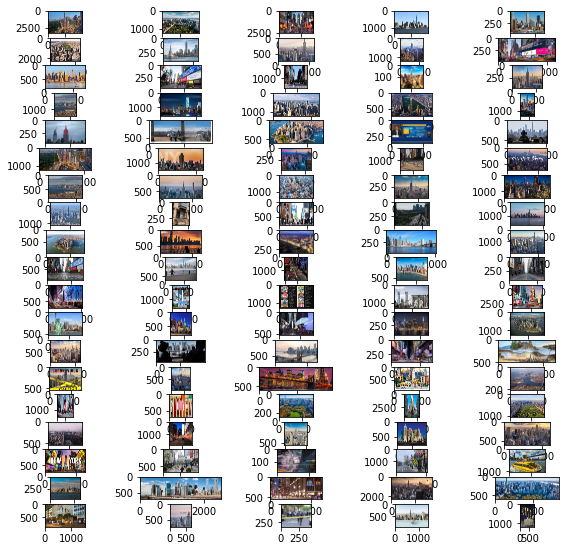

In [61]:
plt.figure(figsize=(10,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    
    plt.imshow(image)

## Webpages as text - articles found with Google search

Code from our [news articles generation project](http://www.aiartonline.com/community/vit-ruzicka-eunsu-kang-david-gordon-ankita-patel-jacqui-fashimpaur-manzil-zaheer/) with article scraping code: https://github.com/previtus/fake_news_generation_mark_I

In [0]:
!pip install newspaper3k

In [0]:
# https://github.com/abenassi/Google-Search-API
!pip install Google-Search-API

In [66]:
import newspaper
from newspaper import Article
from newspaper import ArticleException
from google import google
import requests
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import json
import os
from datetime import datetime

def articleName(author, title, date):
    authorName = author
    if (authorName == None):
        authorName = 'NOAUTHOR'
    else:
        authorName = authorName.replace(' ', '_')
        authorName = authorName.replace('?', '')
    
    titleName = title
    if (titleName == None):
        titleName = 'NOTITLE'
    else:
        titleName = titleName.replace(':', '_')
        titleName = titleName.replace(';', '_')
        titleName = titleName.replace(r'.,', '_')
        titleName = titleName.replace(' ', '_')
        titleName = titleName.replace('?', '')
        titleName = titleName.replace('"', "'")
        titleName = titleName.replace('*', '')
        titleName = titleName.replace('/', '_')
        titleName = titleName.replace('|', '')
        titleName = titleName.replace('$', '')
        titleName = titleName.replace('^', '')
        titleName = titleName.replace('>', '')
        titleName = titleName.replace('<', '')
        titleName = titleName.replace(r'\\\//|<>', '')
    if (date == None):
        dateName = 'NODATE'
    else:
        if(type(date) == str):
            dateName = date
        else:
            dateName = str(date.date())
    delimiter = '$$$$$'
    return authorName + delimiter + titleName + delimiter + dateName + '.json'

In [0]:
!mkdir articles

In [0]:
root_urls = []
queries = ["new york, new york city"]
folder = "articles"

In [80]:
# Getting article URLs!

for quer in queries:
    num_page = 10
    search_results = google.search(quer, num_page)
    if(len(search_results) == 0): continue
    search_res = search_results[0]
    print(search_res)
    print(type(search_res))
    print(type(search_results))
    root_urls.append(search_results)
    #root_urls.append([searchres.link for inter_result in search_results for searchres in inter_result])

GoogleResult(name=New York City - Wikipediaen.wikipedia.org > wiki > New_..
             description=New York City (NYC), often called The City or sim..
<class 'google.modules.standard_search.GoogleResult'>
<class 'list'>


In [0]:
root_urls = [url for urls in root_urls for url in urls]

In [0]:
for url in root_urls:
    print(url)

In [82]:
root_urls = [root_url.link for root_url in root_urls]
print(root_urls)
print(len(root_urls))

['https://en.wikipedia.org/wiki/New_York_City', 'https://www.nyc.gov/', 'https://www.nycgo.com/', 'https://www.nytimes.com/2020/05/21/nyregion/coronavirus-new-york-update.html', 'https://www.nytimes.com/2020/05/21/us/coronavirus-live-updates.html', 'https://www.iloveny.com/places-to-go/new-york-city/', 'https://www.10best.com/destinations/new-york/new-york/', 'https://www.britannica.com/place/New-York-City', 'https://www.visittheusa.com/destination/new-york-city', 'https://nypost.com/2020/05/20/end-new-york-citys-lockdown-now/', 'https://www.tripadvisor.com/Tourism-g60763-New_York_City_New_York-Vacations.html', 'https://www.ny.gov/counties/new-york', 'https://www.theatlantic.com/ideas/archive/2020/05/sorry-haters-new-york-wont-die/611851/', 'https://www.amny.com/', 'https://vote.nyc/', 'https://www.nypl.org/', 'https://newyork.cbslocal.com/2020/05/19/nyc-coronavirus-deaths-zip-codes/', 'https://theculturetrip.com/north-america/usa/new-york/new-york-city/', 'https://www.nbcnewyork.com/n

In [86]:
root_urls = [url for url in root_urls if "wikipedia" not in url] # throw away wikipedia pages (optional ...)
print(root_urls)
print(len(root_urls))

['https://www.nyc.gov/', 'https://www.nycgo.com/', 'https://www.nytimes.com/2020/05/21/nyregion/coronavirus-new-york-update.html', 'https://www.nytimes.com/2020/05/21/us/coronavirus-live-updates.html', 'https://www.iloveny.com/places-to-go/new-york-city/', 'https://www.10best.com/destinations/new-york/new-york/', 'https://www.britannica.com/place/New-York-City', 'https://www.visittheusa.com/destination/new-york-city', 'https://nypost.com/2020/05/20/end-new-york-citys-lockdown-now/', 'https://www.tripadvisor.com/Tourism-g60763-New_York_City_New_York-Vacations.html', 'https://www.ny.gov/counties/new-york', 'https://www.theatlantic.com/ideas/archive/2020/05/sorry-haters-new-york-wont-die/611851/', 'https://www.amny.com/', 'https://vote.nyc/', 'https://www.nypl.org/', 'https://newyork.cbslocal.com/2020/05/19/nyc-coronavirus-deaths-zip-codes/', 'https://theculturetrip.com/north-america/usa/new-york/new-york-city/', 'https://www.nbcnewyork.com/news/local/', 'https://www.usnews.com/news/natio

In [0]:
# Demo purposes:
root_urls = root_urls[0:3]

PS: This code works as a spider, jumps around URLs and gets whatever it can. So ...

*   a.) we have to stop it at some moment ...
*   and b.) there might be a lot of junk when it's done!

In [88]:
from json import JSONDecodeError
from requests.exceptions import Timeout

visited_urls = set([])
saved_articles = set([])
article_lengths = dict([])

while(True):
    if(len(root_urls) == 0):
        break
    root_url = root_urls[0]
    root_urls = root_urls[1:]
    #print(root_urls)
    if (root_url in visited_urls):
        continue
    else:
        visited_urls.add(root_url)
    root_paper = newspaper.build(root_url)
    print(root_url, 'size:', root_paper.size())
    print('category urls count:', len(root_paper.category_urls()))
    adjacent_urls = root_paper.category_urls()
    for adj_url in adjacent_urls:
        if (adj_url in visited_urls):
            continue
        root_urls.append(adj_url)
        #print(root_urls)
    index = 0
    visited_streak = 0
    for carticle in root_paper.articles:
        if (visited_streak > 26):
            break
        article = Article(carticle.url)
        try:
            article.download()
            article.parse()
            
            article_name = articleName(None if article.authors == [] else article.authors[0], article.title, article.publish_date)
            
            if(article_name in saved_articles and len(article.text) <= article_lengths[article_name]):
                print('skipping article')
                visited_streak += 1
                continue
            visited_streak = 0
            article.nlp()
            saved_articles.add(article_name)
            article_lengths[article_name] = (len(article.text))
            payload = {"url": article.url, "title": article.title, "content": article.text}
            features = {"content" : {"keywords": [{"keyword": word} for word in article.keywords]}}
            
            articleJSON = {"features":features, "url":article.url, "date":article.publish_date, "title":article.title, "authors":article.authors, "body":article.text}
            with open(folder+"/"+article_name, 'w') as outfile:
                json.dump(articleJSON, outfile, indent=2, default=str)
                print("saved article")
        except ArticleException:
            continue
        except FileNotFoundError:
            continue
        except OSError:
            continue
        except UnicodeError:
            continue
        except Exception:
            continue
        index += 1
    print(index)

https://www.nyc.gov/ size: 37
category urls count: 15


/usr/local/lib/python3.6/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
skipping article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
saved article
skipping article
32
https://www.nycgo.com/ size: 6
category urls count: 17
saved article
saved article
saved article
saved article
saved article
saved article
6
https://www.nytimes.com/2020/05/21/nyregion/coronavirus-new-york-update.html size: 69
category urls count: 3
saved article
skipping article
skipping article
saved article
skipping article
skipping article
skipping article
skipping article
skipping article
skipping article
skipping article
saved article
saved article
saved article
saved article
saved article
saved article


KeyboardInterrupt: ignored

In [91]:
!ls articles -luah

total 2.3M
drwxr-xr-x  2 root root  36K May 21 18:46  .
drwxr-xr-x 12 root root 4.0K May 21 18:30  ..
-rw-r--r--  1 root root 1.4K May 21 18:44 'Aaron_E._Carroll$$$$$How_to_Make_Summer_Camp_Work_During_the_Coronavirus_-_The_New_York_Times$$$$$2020-05-21.json'
-rw-r--r--  1 root root 3.0K May 21 18:43 'Alan_Feuer$$$$$6_Takeaways_From_Michael_Cohen’s_Guilty_Plea$$$$$2018-08-21.json'
-rw-r--r--  1 root root 1.9K May 21 18:44 'Alan_Yuhas$$$$$How_the_Pandemic_Splintered_the_Appalachian_Trail$$$$$2020-05-21.json'
-rw-r--r--  1 root root 1.6K May 21 18:45 'Al_Baker$$$$$At_School,_Turning_Good_Food_Into_Perfectly_Good_Compost$$$$$2014-06-23.json'
-rw-r--r--  1 root root  24K May 21 18:40 'American_Association_Of_Port_Authorities$$$$$Port_of_New_York_and_New_Jersey$$$$$NODATE.json'
-rw-r--r--  1 root root  541 May 21 18:42 'April$$$$$City_Council_Covid-19_relief_package$$$$$NODATE.json'
-rw-r--r--  1 root root 1.5K May 21 18:44 'Cate_Blanchett$$$$$Opinion__Cate_Blanchett__I’m_Not_‘Mrs._America.

In [103]:
file_example = "articles/David_E._Sanger$$$$$Trump_Will_Withdraw_From_‘Open_Skies’_Arms_Control_Treaty$$$$$2020-05-21.json"
with open(file_example) as json_file:
    data = json.load(json_file)
    json_formatted_str = json.dumps(data, indent=2)

print(json_formatted_str)

{
  "features": {
    "content": {
      "keywords": [
        {
          "keyword": "president"
        },
        {
          "keyword": "nuclear"
        },
        {
          "keyword": "skies"
        },
        {
          "keyword": "control"
        },
        {
          "keyword": "negotiated"
        },
        {
          "keyword": "treatytwo"
        },
        {
          "keyword": "violating"
        },
        {
          "keyword": "union"
        },
        {
          "keyword": "trump"
        },
        {
          "keyword": "arms"
        },
        {
          "keyword": "state"
        },
        {
          "keyword": "open"
        },
        {
          "keyword": "withdraw"
        },
        {
          "keyword": "soviet"
        },
        {
          "keyword": "treaty"
        }
      ]
    }
  },
  "url": "https://www.nytimes.com/2020/05/21/us/politics/trump-open-skies-treaty-arms-control.html",
  "date": "2020-05-21 00:00:00",
  "title": "Trump W